# Preparing the IMDB data

In [13]:
from keras.datasets import imdb
from keras.preprocessing import sequence

max_features = 10000
maxlen = 500
batch_size = 3

print('Loading data...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(
                                                    num_words=max_features)

print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')
print('Pad sequences (samples x time)')

input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)

print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

Loading data...
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
input_train shape: (25000, 500)
input_test shape: (25000, 500)


# Training the model with Embedding and SimpleRNN layers

In [14]:
from keras.layers import Dense

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

history = model.fit(input_train, y_train,
                epochs=10,
                batch_size=128,
                validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 28s 165ms/step - loss: 0.5741 - acc: 0.6962 - val_loss: 0.4299 - val_acc: 0.8170
Epoch 2/10
157/157 [==============================] - 25s 160ms/step - loss: 0.3490 - acc: 0.8561 - val_loss: 0.4717 - val_acc: 0.7748
Epoch 3/10
157/157 [==============================] - 27s 171ms/step - loss: 0.2637 - acc: 0.8987 - val_loss: 0.3633 - val_acc: 0.8456
Epoch 4/10
157/157 [==============================] - 27s 172ms/step - loss: 0.2166 - acc: 0.9183 - val_loss: 0.4785 - val_acc: 0.7754
Epoch 5/10
157/157 [==============================] - 27s 174ms/step - loss: 0.1647 - acc: 0.9398 - val_loss: 0.4356 - val_acc: 0.8632
Epoch 6/10
157/157 [==============================] - 29s 185ms/step - loss: 0.1156 - acc: 0.9614 - val_loss: 0.5635 - val_acc: 0.7700
Epoch 7/10
157/157 [==============================] - 26s 169ms/step - loss: 0.0809 - acc: 0.9740 - val_loss: 0.4302 - val_acc: 0.8622
Epoch 8/10
157/157 [==============================] - 2

# Plotting results

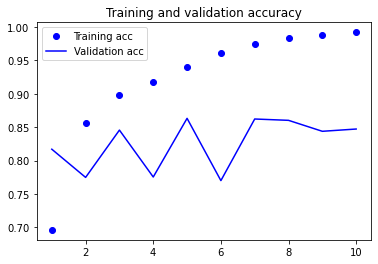

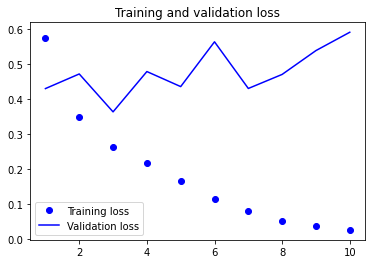

In [15]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()